In [1]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time

#data from Kaggle.com
#open file
e='h.csv'
df=pd.read_csv(e)
#print(df)

In [2]:
#parse index
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
indexeddf=df.set_index(['Date'])
#print(indexeddf)

In [3]:
#parsing to time format and extracting dates 
x=df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%y')

Day=df['Date'].dt.day_name()
Month=df['Date'].dt.month_name()
Year=df['Date'].dt.year

In [4]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day_name()
#print(df)

In [5]:
date_order = df['Date'].value_counts().index
domain_order = df['Domain'].value_counts().index
country_order = df['Country '].value_counts().index

In [6]:
base_color = sns.color_palette()[0]
country_order = df['Country '].value_counts().index
price_order=df['Service_price'].value_counts().index
month_order=df['Month'].value_counts().index
day_order=df['Day'].value_counts().index

IT field is a large domain, but I am particularly interested in understanding which job in the field of Anlaysis is more popular in EU countries (mostly) and which one is best paid.

Here is my understanding

# How hourly rate changes across the domains

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

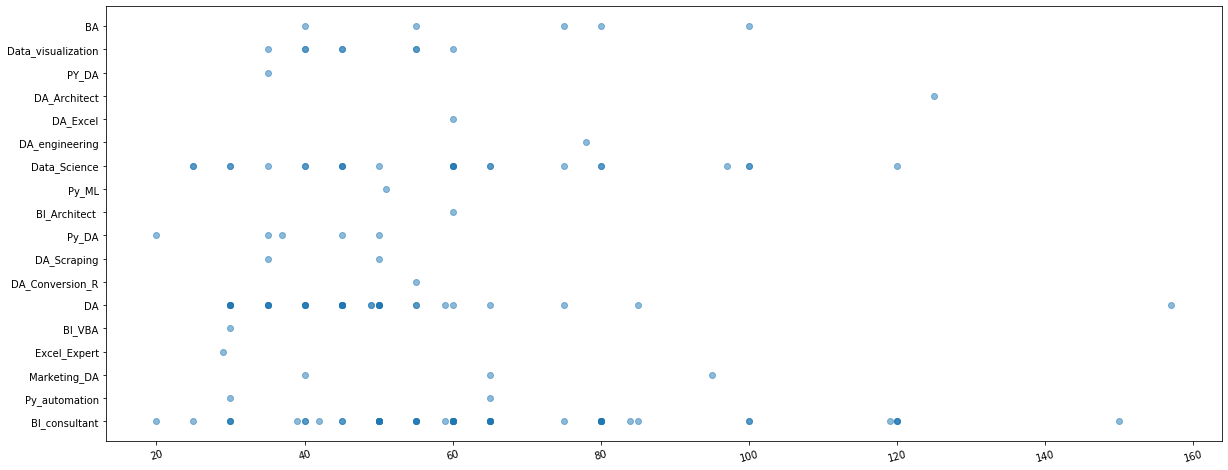

In [7]:
plt.figure(figsize=(20,8))
plt.scatter(data = df, y = 'Domain', x = 'Service_price', alpha=1/2)
plt.xticks(rotation=15)

# Job count by country with monthly grouping, accross the countries 

In [8]:
ct_counts = df.groupby(['Country ', 'Month']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Country ', columns = 'Month', values = 'count')
ct_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Country,,,,,,,,,,,,
Australia,7.0,NaN,NaN,9.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
Belgium,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,12.0,NaN,NaN,NaN
Fra,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0
Ger,NaN,4.0,NaN,NaN,NaN,10.0,9.0,NaN,NaN,NaN,NaN,NaN
Luxembourg,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


# Heatmap showing job count

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

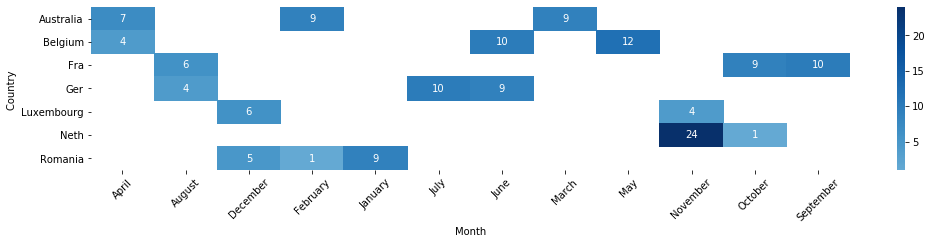

In [9]:
plt.figure(figsize=(17,3))
sns.heatmap(ct_counts, annot = True, cmap = 'Blues', center = 0)
plt.xticks(rotation=45)

In [10]:
domain_counts = df.groupby(['Domain', 'Month']).size()
domain_counts = domain_counts.reset_index(name='count')
domain_counts = domain_counts.pivot(index = 'Domain', columns = 'Month', values = 'count')
domain_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Domain,,,,,,,,,,,,
BA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN
BI_Architect,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BI_VBA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
BI_consultant,5.0,3.0,3.0,4.0,3.0,2.0,8.0,5.0,5.0,11.0,3.0,4.0
DA,1.0,3.0,4.0,4.0,2.0,2.0,3.0,1.0,2.0,7.0,3.0,3.0


# Heatmap showing job count by domains grouped monthly

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

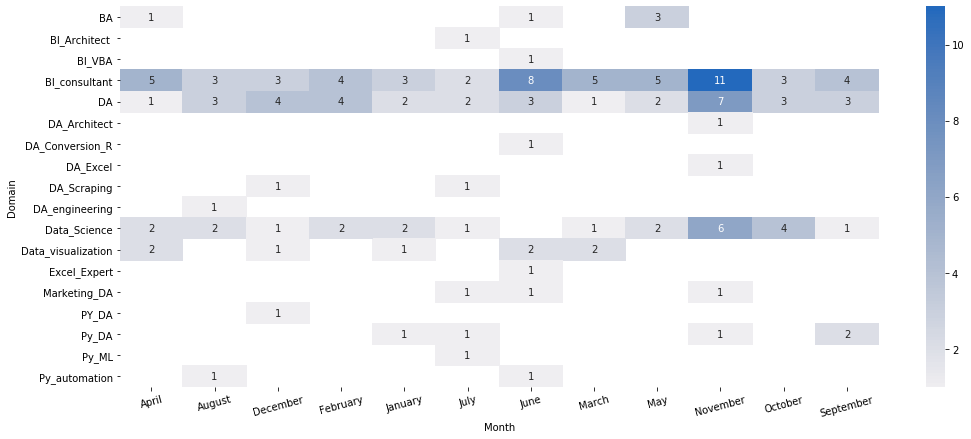

In [11]:
plt.figure(figsize=(17,7))
sns.heatmap(domain_counts, annot = True, cmap = 'vlag_r', center = 0)
plt.xticks(rotation=15)

# Service hourly rate trend accross the countries

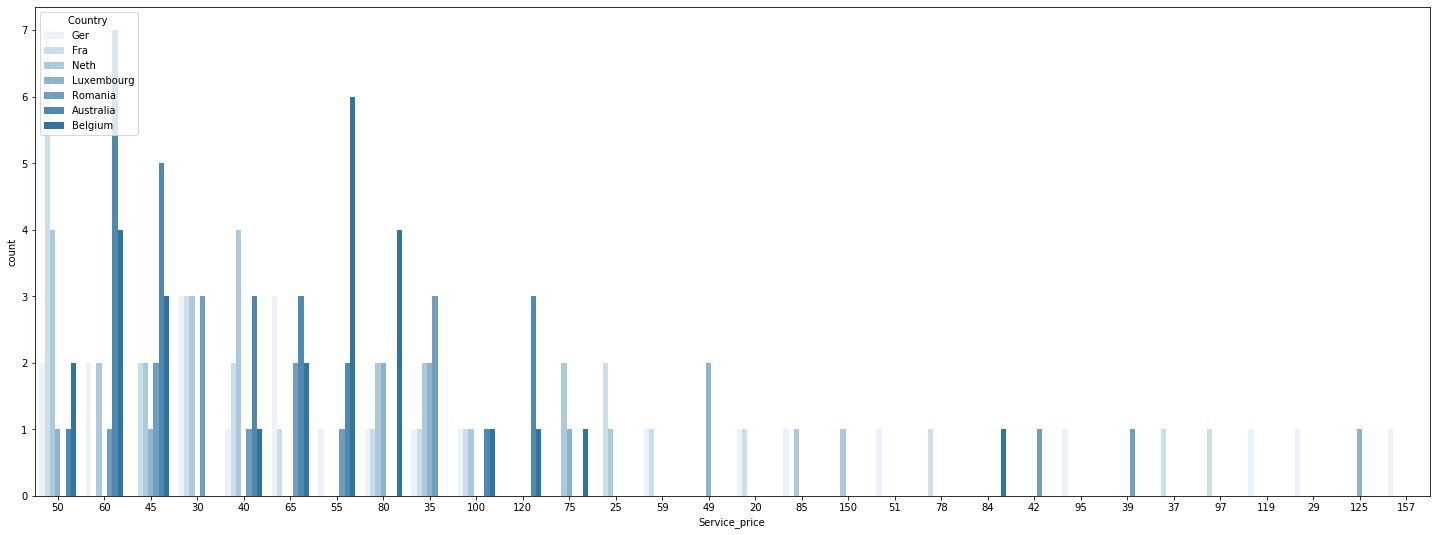

In [12]:
plt.figure(figsize=(25,9))
sns.countplot(data = df, x = 'Service_price', hue = 'Country ',color=base_color,order=price_order)

# Service rate in months

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

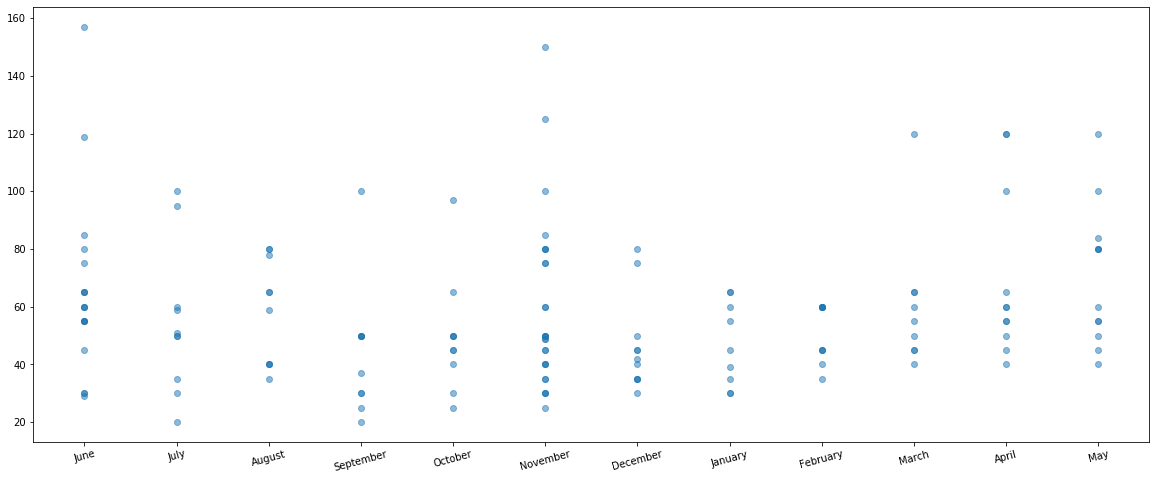

In [13]:
plt.figure(figsize=(20,8))
plt.scatter(data = df, y = 'Service_price', x = 'Month', alpha=1/2)
plt.xticks(rotation=15)

# Relationship between service rate and year
It seems a positive one

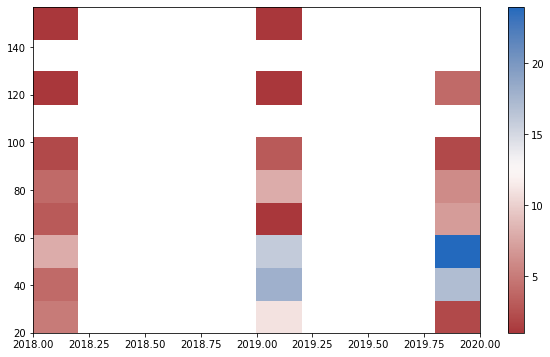

In [14]:
plt.figure(figsize=(10,6))
plt.hist2d(data = df, y = 'Service_price', x = 'Year',cmin=0.5,cmap = 'vlag_r')
plt.colorbar()

# Which domain is more popular? 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

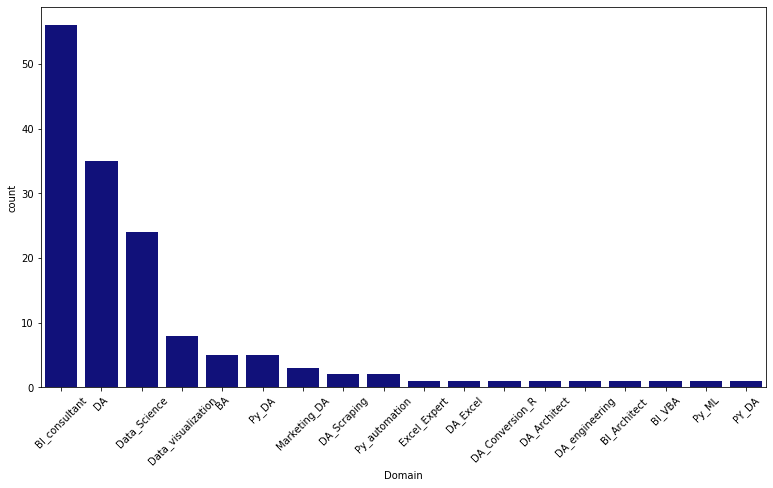

In [15]:
plt.figure(figsize=(13,7))
sns.countplot(data=df,x='Domain',color='darkblue',order=domain_order)
plt.xticks(rotation=45)

# In which countries is BI consultant used more? 

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text xticklabel objects>)

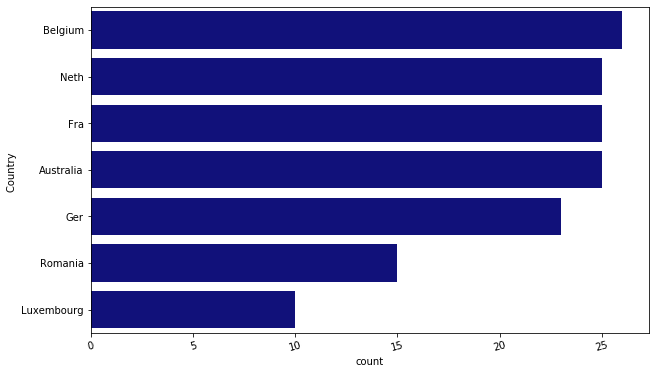

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,y='Country ',color='darkblue',order=country_order)
plt.xticks(rotation=15)

# When is it best paid?

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

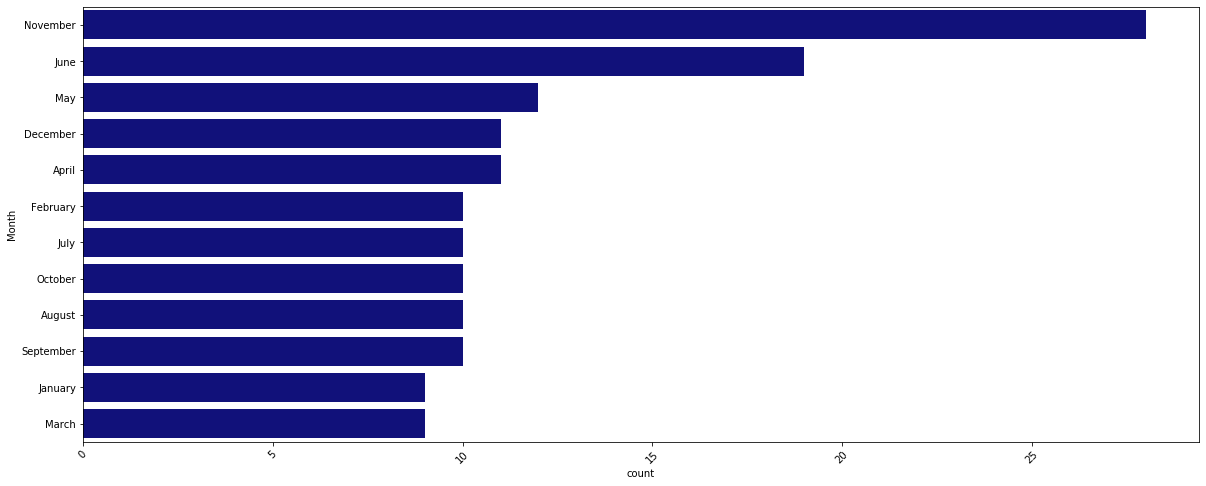

In [17]:
plt.figure(figsize=(20,10))
plt.figure(figsize=(20,8))
sns.countplot(data=df,y='Month',color='darkblue', order=month_order)
plt.xticks(rotation=45)

# Which day is it best paid?

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

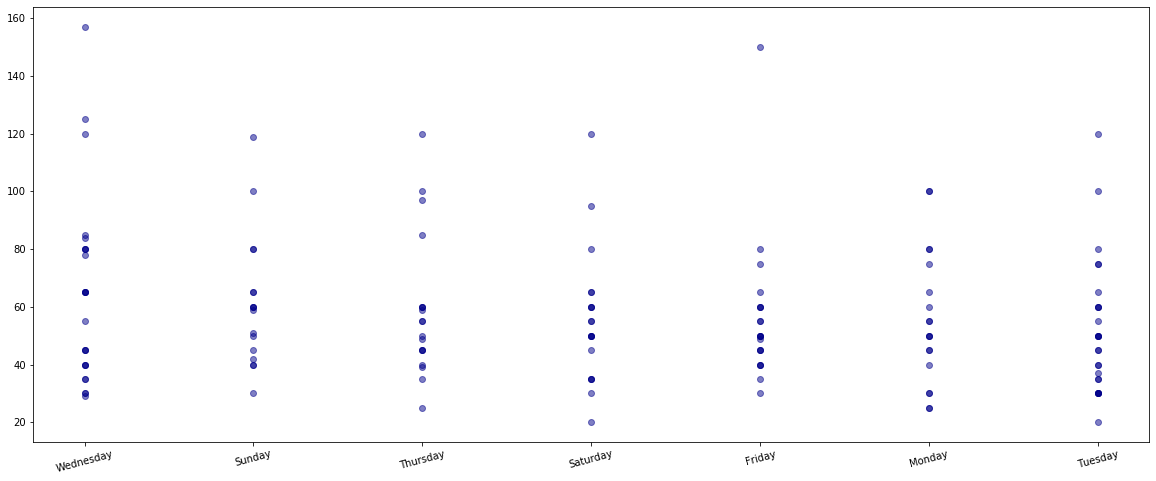

In [18]:
plt.figure(figsize=(20,10))
plt.figure(figsize=(20,8))
plt.scatter(data = df, y = 'Service_price', x = 'Day', color='darkblue', alpha=1/2)
plt.xticks(rotation=15)

# Thank you :)